In [1]:
# Dependencies and Setup 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats

In [2]:
# File to Load -STATE RAW (Remember to Change These)
home_value_data_to_load = "C:/Users/alisa/GIT/project-1/resources/State_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv"

# Read rwa data File and store into Pandas DataFrames
home_value_raw = pd.read_csv(home_value_data_to_load)


home_value_raw

,RegionID,SizeRank,RegionName,RegionType,StateName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,...,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31,2022-01-31,2022-02-28,2022-03-31
0,9,0,California,State,CA,202744.0,203606.0,204690.0,206971.0,209417.0,...,677568.0,696320.0,710135.0,720036.0,725067.0,730580.0,737410.0,747660.0,759840.0,774899.0
1,54,1,Texas,State,TX,114109.0,114234.0,114273.0,114480.0,114529.0,...,251448.0,257104.0,262775.0,267628.0,271901.0,275537.0,279800.0,284463.0,289905.0,295319.0
2,43,2,New York,State,NY,148975.0,149737.0,150374.0,151718.0,152933.0,...,352114.0,357721.0,362532.0,366549.0,369590.0,372459.0,375299.0,378578.0,382341.0,387069.0
3,14,3,Florida,State,FL,116274.0,116617.0,116980.0,117685.0,118355.0,...,296250.0,304232.0,312319.0,320255.0,327674.0,335023.0,341864.0,349456.0,357423.0,367175.0
4,21,4,Illinois,State,IL,147631.0,147955.0,148395.0,149261.0,150153.0,...,232170.0,235639.0,239047.0,241589.0,243829.0,246095.0,248604.0,250960.0,253330.0,256010.0
5,47,5,Pennsylvania,State,PA,105998.0,106357.0,106647.0,107212.0,107700.0,...,234842.0,238306.0,241089.0,243249.0,245236.0,247103.0,249339.0,251872.0,254647.0,257272.0
6,44,6,Ohio,State,OH,110117.0,110279.0,110452.0,110900.0,111443.0,...,182703.0,185305.0,187616.0,189668.0,191383.0,193093.0,195172.0,197476.0,200061.0,202341.0
7,30,7,Michigan,State,MI,122341.0,122545.0,122935.0,123628.0,124478.0,...,205171.0,208727.0,211861.0,214154.0,216351.0,217953.0,220043.0,222510.0,225343.0,228120.0
8,16,8,Georgia,State,GA,131873.0,132318.0,132761.0,133648.0,134495.0,...,249446.0,254964.0,260548.0,265868.0,271316.0,276782.0,283071.0,289224.0,295367.0,300885.0
9,36,9,North Carolina,State,NC,134785.0,135115.0,135398.0,135985.0,136537.0,...,251275.0,257097.0,263234.0,269025.0,274235.0,278936.0,284174.0,289865.0,296046.0,302153.0


In [3]:
#change raw csv  to  melt and upivoted : date and price
home_value_unpivoted = home_value_raw.melt(id_vars=['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       ], var_name='date', value_name='price')
home_value_unpivoted.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,date,price
0,9,0,California,State,CA,2000-01-31,202744.0
1,54,1,Texas,State,TX,2000-01-31,114109.0
2,43,2,New York,State,NY,2000-01-31,148975.0
3,14,3,Florida,State,FL,2000-01-31,116274.0
4,21,4,Illinois,State,IL,2000-01-31,147631.0


In [4]:
#clean data farame - dropNa on home_value_unpivoted
home_value_unpivoted_dropna = home_value_unpivoted.dropna()
home_value_unpivoted_dropna

,RegionID,SizeRank,RegionName,RegionType,StateName,date,price
0,9,0,California,State,CA,2000-01-31,202744.0
1,54,1,Texas,State,TX,2000-01-31,114109.0
2,43,2,New York,State,NY,2000-01-31,148975.0
3,14,3,Florida,State,FL,2000-01-31,116274.0
4,21,4,Illinois,State,IL,2000-01-31,147631.0
...,...,...,...,...,...,...,...
13612,3,46,Alaska,State,AK,2022-03-31,315353.0
13613,37,47,North Dakota,State,ND,2022-03-31,268918.0
13614,58,48,Vermont,State,VT,2022-03-31,341415.0
13615,12,49,District of Columbia,State,DC,2022-03-31,708001.0


In [5]:
#save file to summerry folder
home_value_unpivoted_dropna.to_csv('C:/Users/alisa/GIT/project-1/clean_source/home_value_unpivoted_dropna.csv')

In [6]:
State_df = home_value_unpivoted_dropna.groupby(['StateName' , 'RegionID'])
State_df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,date,price
0,9,0,California,State,CA,2000-01-31,202744.0
1,54,1,Texas,State,TX,2000-01-31,114109.0
2,43,2,New York,State,NY,2000-01-31,148975.0
3,14,3,Florida,State,FL,2000-01-31,116274.0
4,21,4,Illinois,State,IL,2000-01-31,147631.0
...,...,...,...,...,...,...,...
5555,37,47,North Dakota,State,ND,2009-01-31,168050.0
5606,37,47,North Dakota,State,ND,2009-02-28,168219.0
5657,37,47,North Dakota,State,ND,2009-03-31,168212.0
5708,37,47,North Dakota,State,ND,2009-04-30,168013.0


In [7]:
#summery average , variance , std , sem 

States = State_df["StateName"].nunique()
Average =State_df["price"].mean()
variance =State_df["price"].var()
std =State_df["price"].std()
sem =State_df["price"].sem()

State_Summary_Statistics = pd.DataFrame({
    

    'average_home_price':Average,
    'Variance_home_price':variance,
    'Standard_Deviation_home_price':std,
    'SEM_home_price':sem
})
State_Summary_Statistics
State_Summary_Statistics.head()

,,average_home_price,Variance_home_price,Standard_Deviation_home_price,SEM_home_price
StateName,RegionID,,,,
AK,3,236208.887218,2.118290e+09,46024.881338,2821.966534
AL,4,128716.220974,3.071478e+08,17525.633834,1072.551373
AR,6,110130.000000,3.136389e+08,17709.852573,1085.860731
AZ,8,210609.290566,3.816756e+09,61779.898322,3795.108986
CA,9,422680.086142,1.530811e+10,123725.945358,7571.904889


In [8]:
#sort to find top 5 state
State_df2 = pd.DataFrame({'Average Home Value': Average}).sort_values(['Average Home Value'], ascending=False)                                             
                                                                                                                
State_df2.head()
State_df2_reset_index = State_df2.reset_index()
State_df2_top5 = State_df2_reset_index.head(5)
State_df2_top5

,StateName,RegionID,Average Home Value
0,HI,18,504070.936330
1,DC,12,460157.760300
2,CA,9,422680.086142
3,MA,26,356476.779026
4,NJ,40,317939.014981


<AxesSubplot:title={'center':'price'}, xlabel='StateName'>

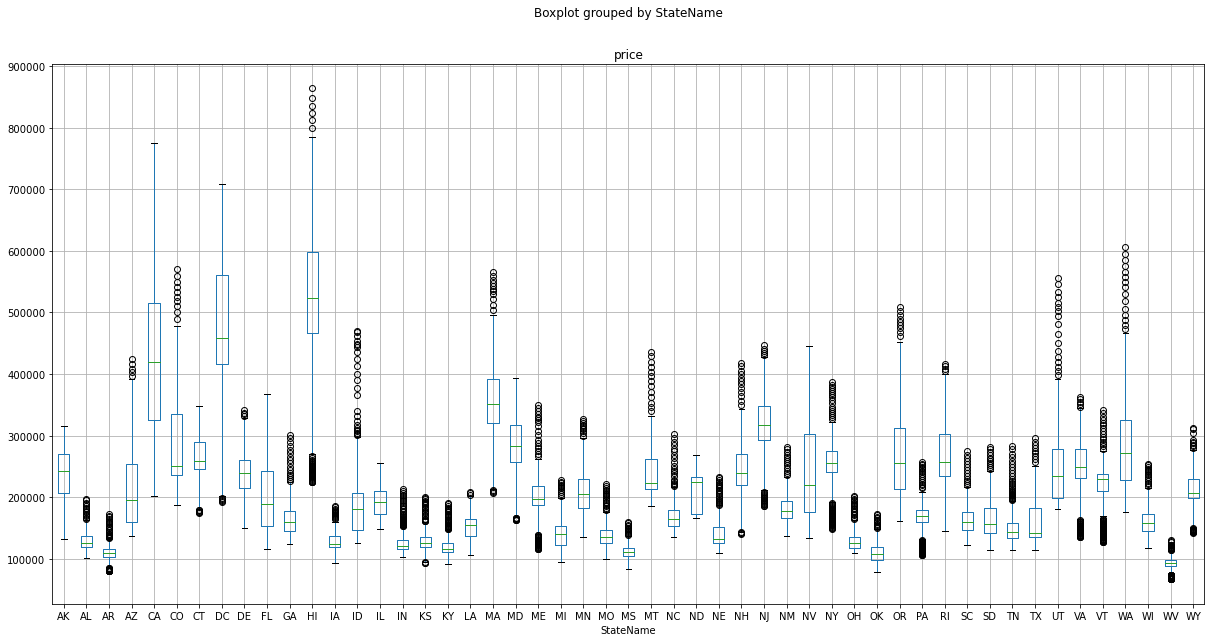

In [9]:
# Create a boxplot to compare all state from 2000 to end of march 2022
home_value_unpivoted_dropna.boxplot("price", by="StateName", figsize=(20, 10))


F_onewayResult(statistic=122.0636293024792, pvalue=8.814967969996069e-89)

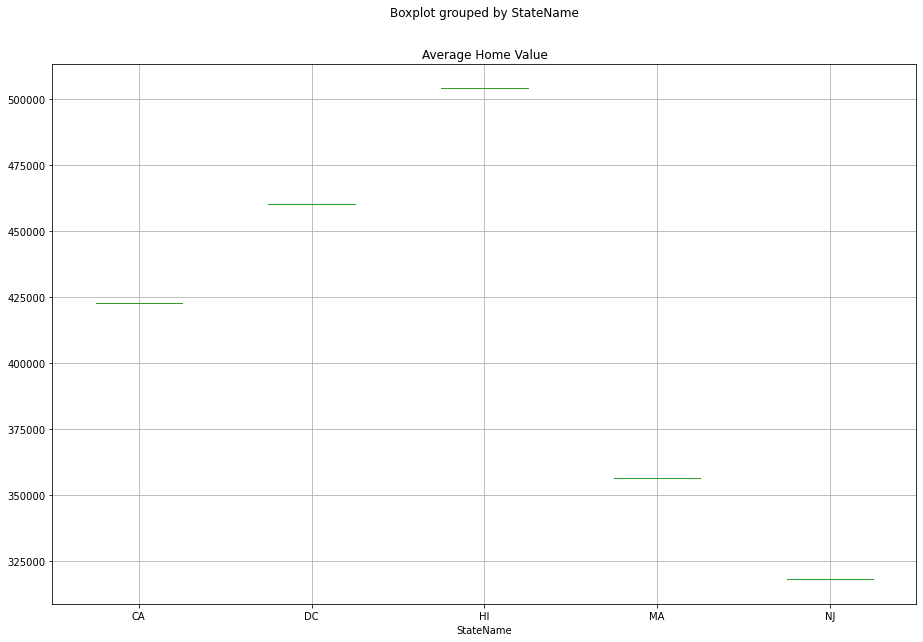

In [10]:
# Perform the ANOVA  for top 5 state from 2000 to end of march 2022
# state HI = 18 , state 12 = DC , State CA = 9, state MA = 26 ,  state nj = 40)    

State_df2_top5.boxplot("Average Home Value", by="StateName", figsize=(15, 10))


group0 = home_value_unpivoted_dropna[home_value_unpivoted_dropna["RegionID"] == 18]["price"] #
group1 = home_value_unpivoted_dropna[home_value_unpivoted_dropna["RegionID"] == 12]["price"] #
group2 = home_value_unpivoted_dropna[home_value_unpivoted_dropna["RegionID"] == 9]["price"] #
group3 = home_value_unpivoted_dropna[home_value_unpivoted_dropna["RegionID"] == 26]["price"] #
group4 = home_value_unpivoted_dropna[home_value_unpivoted_dropna["RegionID"] == 40]["price"] #

#ANOVA Oneway Test
stats.f_oneway(group0, group1, group2, group3 ,group4)

#p-value greater than 0.05    *******************************
# If the p-value is large (> 0.05), it indicates weak evidence against the null hypothesis.
#As a result, the null hypothesis is not rejected.
#Thus for a hypothesis with a p-value greater than 0.05, the null hypothesis is not rejected, and the alternative hypothesis is not accepted.
#This means that the results of the research/ study are not statistically significant.

#p-value less than 0.05
#If the p-value is small (< 0.05), it indicates a piece of strong evidence against the null hypothesis.
#As a result, the null hypothesis is rejected.
#Thus for a hypothesis with a p-value less than 0.05, the null hypothesis is rejected, and the alternative hypothesis is accepted.
#This means that the results of the research/ study are statistically significant.

In [11]:
#top 2 state from 2000 to end of march 2022
State_df2_top2 = State_df2_reset_index.head(2)
State_df2_top2

,StateName,RegionID,Average Home Value
0,HI,18,504070.93633
1,DC,12,460157.76030


F_onewayResult(statistic=13.028463629177644, pvalue=0.00033578407607901705)

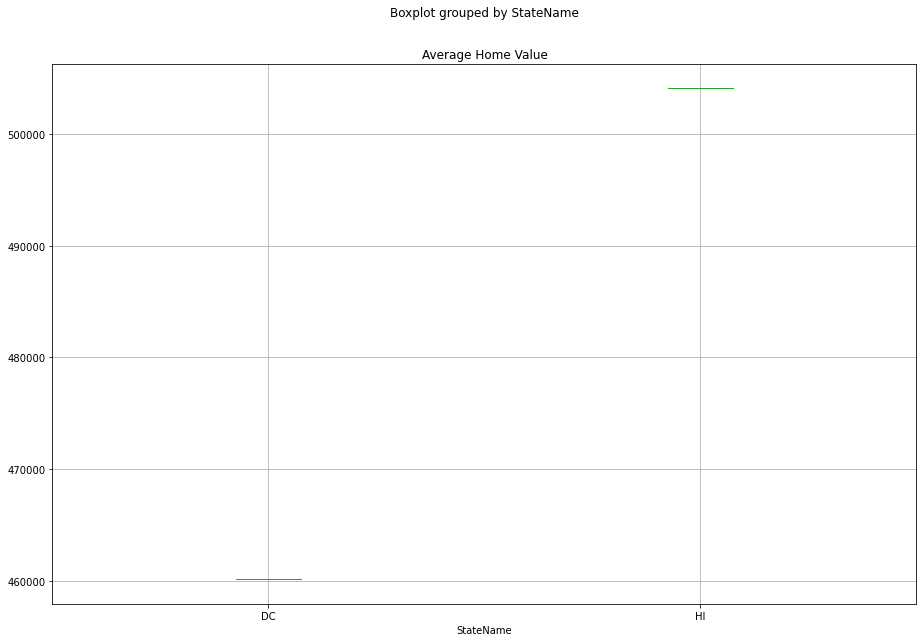

In [12]:
# Perform the ANOVA  for top 2 state from 2000 to end of march 2022
# state HI = 18 , state 12 = DC ) 
State_df2_top2.boxplot("Average Home Value", by="StateName", figsize=(15, 10))
stats.f_oneway(group0, group1)

#p-value greater than 0.05
# If the p-value is large (> 0.05), it indicates weak evidence against the null hypothesis.
#As a result, the null hypothesis is not rejected.
#Thus for a hypothesis with a p-value greater than 0.05, the null hypothesis is not rejected, and the alternative hypothesis is not accepted.
#This means that the results of the research/ study are not statistically significant.

#p-value less than 0.05
#If the p-value is small (< 0.05), it indicates a piece of strong evidence against the null hypothesis.
#As a result, the null hypothesis is rejected.
#Thus for a hypothesis with a p-value less than 0.05, the null hypothesis is rejected, and the alternative hypothesis is accepted.
#This means that the results of the research/ study are statistically significant.